In [1]:
from Fourier_Neural_Operator import Fourier_Neural_Operator as FNO
from Fourier_Neural_Operator import SpectralConv2d_fast, SimpleBlock2d, Net2d 
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
# Plot function

def plot_images(data1):
    fig = plt.figure(figsize=(40., 40.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(1, 10),  # creates 2x2 grid of axes
                    axes_pad=0.1,  # pad between axes in inch.
                    )
    for i, ax in zip(range(0, 10),grid):
        # Iterating over the grid returns the Axes. #shape of arr is (nx, ny, time, channel)
        ax.imshow(np.array(data1.detach())[1,:,:,1,i])
        ax.set_title("Timestep: '{0}'".format(i))

In [ ]:
np.load('Data_dt5_256(0,64).npy').shape

In [7]:
%%time
# D_new.npy model_mod.pt


solver = FNO('Data_dt5_(0.25,0.25).npy', 'model_ts5_(0.25,0.25).pt', width = 10)
solver.process_data()
prediction1, y1, x1 = solver.predict(2)
loss = []
for i in range(0, 10):
    loss_temp = solver.show_error(10, 0, i)
    print(loss_temp)
    loss.append(loss_temp)

tensor(3.1639e-08, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(2.9405e-08, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(3.0560e-08, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(3.3665e-08, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(3.8107e-08, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(4.3953e-08, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(5.2657e-08, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(6.3181e-08, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(7.8435e-08, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(1.0108e-07, dtype=torch.float64, grad_fn=<MseLossBackward>)
Wall time: 12.4 s


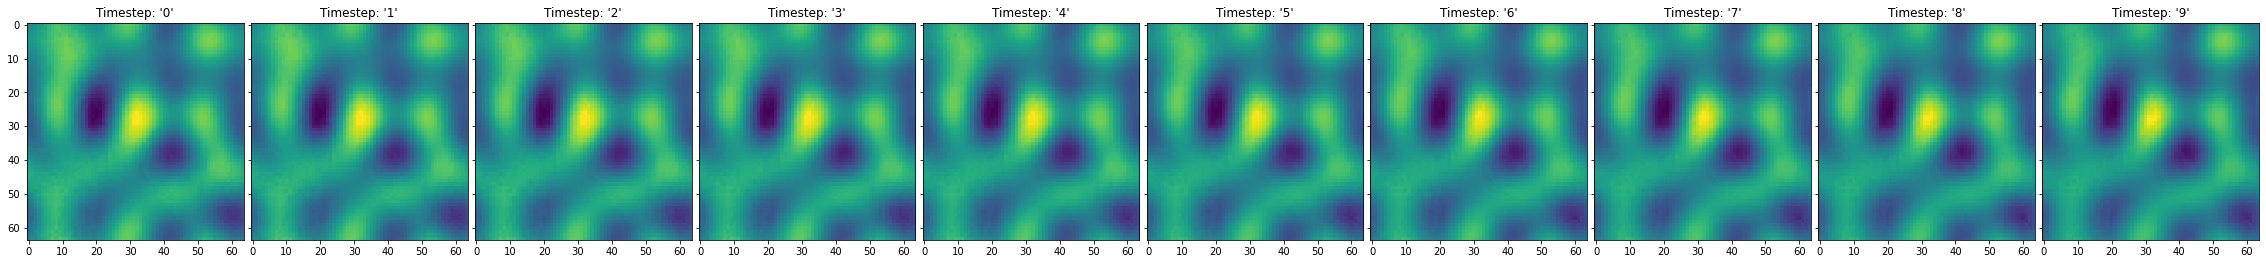

In [8]:
# Prediction for dt 5

plot_images(prediction1)

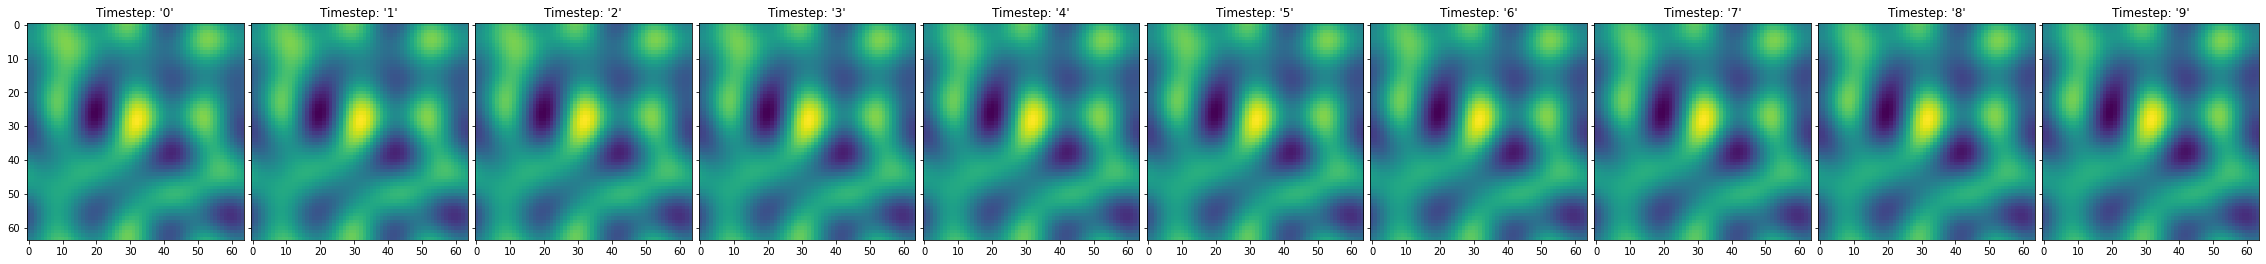

In [9]:
# Ground truth for dt 5

plot_images(y1)

In [ ]:
plot_images(x1)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.array(loss))
plt.xticks(np.arange(0, 10, 1))
plt.savefig('LossCurve_dt5.jpg')

In [ ]:
plot_images(x1)

In [ ]:
import torch

checkpoint = torch.load('model_ts1.pt', map_location=torch.device('cpu'))
model = Net2d(12, 10)
model.load_state_dict(checkpoint['model_state_dict'])

In [ ]:
D = np.load('Data_dt1.npy')

In [ ]:
D.shape

In [ ]:
import torch

sub = 1
S = 256
T_in = 10
T = 10
step = 1

ntest = 2

batch_size = 20

test_a = torch.tensor(D[-ntest:,::sub,::sub,::sub,:T_in])
test_u = torch.tensor(D[-ntest:,::sub,::sub,::sub,T_in:T+T_in])

gridx = torch.tensor(np.linspace(0, 64, S), dtype=torch.float)
gridx = gridx.reshape(1, S, 1, 1).repeat([1, 1, S, 1])
gridx = gridx.reshape(1, S, S, 1, 1).repeat([1, 1, 1, 2, 1])
gridy = torch.tensor(np.linspace(0, 64, S), dtype=torch.float)
gridy = gridy.reshape(1, 1, S, 1).repeat([1, S, 1, 1])
gridy = gridy.reshape(1, S, S, 1, 1).repeat([1, 1, 1, 2, 1])

test_a = torch.cat((test_a, gridx.repeat([ntest,1,1,1,1]), gridy.repeat([ntest,1,1,1,1])), dim=-1)

test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_a, test_u), batch_size=batch_size, shuffle=False)

In [ ]:
test_a.shape

In [ ]:
%%time

xx = []
yy = []
yh = []
for x, y in test_loader:
    xx.append(x)
    yy.append(y)

x = xx[0]

for t in range(0, T+10, step):


    im = model(x.float())

    if t ==0:
        pred = im
    else:
        pred = torch.cat((pred, im), -1)
        # pred = im

    x = torch.cat((x[..., step:-2], im, gridx.repeat([ntest, 1, 1, 1, 1]), gridy.repeat([ntest, 1, 1, 1, 1])), dim=-1)


In [ ]:
plot_images(pred)

In [ ]:
plot_images(yy[0])

In [ ]:
plot_images(xx[0])

In [ ]:
from torch import nn

loss = []
for i in range(0,10):
    loss.append(nn.MSELoss(size_average = True, reduce = True, reduction = 'mean')(pred[1,:,:,1,i], yy[0][1,:,:,1,i]))
    
plt.plot(np.array(loss))
plt.xticks(np.arange(0, 10, 1))
plt.savefig('LossCurve_dt5.jpg')

In [ ]:
loss

In [ ]:
checkpoint = torch.load('model_ts5_new_mse.pt', map_location=torch.device('cpu'))

In [ ]:
loss = checkpoint['loss']

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss/800/10)

In [ ]:
loss[282]/800/10